In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from satpy import Scene
import glob

In [3]:
files = glob.glob(r'D:\ftp_h8_hsd_25Jul\*.dat') 

## Create readers and open files.

Date: 2021-07-25 Time: 02:00 to 02:10

Bands: 01 to 16

using ftp_himawari8_hsd.py download *.dat files from this github for 10 minutes durations 

In [4]:
from datetime import datetime 
scn = Scene(filenames=files,  reader='ahi_hsd',filter_parameters={'start_time': datetime(2021,7,25,2,00), 'end_time': datetime(2021,7,25,2,10)})

## Load datasets from input files.

In [5]:
scn.load(["B01"])

In [6]:
scn.save_dataset('B01', 'B01.png')

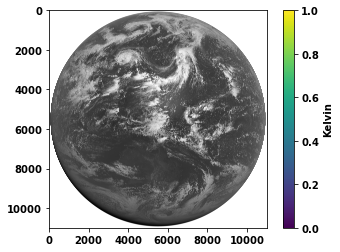

In [7]:
image = plt.imread('B01.png') 
plt.imshow(image)
cbar=plt.colorbar()
cbar.set_label("Kelvin")
plt.show()

In [8]:
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='‘admin_0_boundary_lines_land',
    scale='50m',
    facecolor='none')

## Resample from Satellite Imagery and save resampled datasets to current directory.


### Crop Scene to a specific Area boundary or bounding box.

#### Cropping Area: Australia

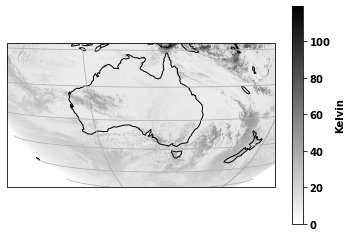

In [9]:
cropped_scn_aus = scn.crop(ll_bbox=(93.41, -60.56, 173.35, -8.47))
remapped_scn_aus = cropped_scn_aus.resample(resampler='native')

ccrs= remapped_scn_aus["B01"].attrs['area'].to_cartopy_crs()
ax=plt.axes(projection=ccrs)

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

ax.gridlines()
ax.set_global()

plt.imshow(remapped_scn_aus["B01"], transform=ccrs, extent=ccrs.bounds, origin='upper',cmap=plt.cm.gist_gray_r )
cbar=plt.colorbar()
cbar.set_label("Kelvin")
plt.show()

## Satpy Composites

Get names of composites that can be generated from the available datasets.

In [10]:
scn.available_composite_ids()

[DataID(name='airmass'),
 DataID(name='ash'),
 DataID(name='cloud_phase_distinction'),
 DataID(name='colorized_ir_clouds'),
 DataID(name='convection'),
 DataID(name='day_microphysics_ahi'),
 DataID(name='day_microphysics_eum'),
 DataID(name='dust'),
 DataID(name='fire_temperature'),
 DataID(name='fire_temperature_39refl'),
 DataID(name='fire_temperature_awips'),
 DataID(name='fire_temperature_eumetsat'),
 DataID(name='fog'),
 DataID(name='green'),
 DataID(name='green_nocorr'),
 DataID(name='ir_cloud_day'),
 DataID(name='mid_vapor'),
 DataID(name='natural_color'),
 DataID(name='natural_color_nocorr'),
 DataID(name='natural_color_raw'),
 DataID(name='night_ir_alpha'),
 DataID(name='night_ir_with_background'),
 DataID(name='night_ir_with_background_hires'),
 DataID(name='night_microphysics'),
 DataID(name='overview'),
 DataID(name='true_color'),
 DataID(name='true_color_nocorr'),
 DataID(name='true_color_raw'),
 DataID(name='true_color_with_night_ir'),
 DataID(name='true_color_with_night_

All configured composites known to this Scene.

In [11]:
scn.available_composite_names()

['airmass',
 'ash',
 'cloud_phase_distinction',
 'colorized_ir_clouds',
 'convection',
 'day_microphysics_ahi',
 'day_microphysics_eum',
 'dust',
 'fire_temperature',
 'fire_temperature_39refl',
 'fire_temperature_awips',
 'fire_temperature_eumetsat',
 'fog',
 'green',
 'green_nocorr',
 'ir_cloud_day',
 'mid_vapor',
 'natural_color',
 'natural_color_nocorr',
 'natural_color_raw',
 'night_ir_alpha',
 'night_ir_with_background',
 'night_ir_with_background_hires',
 'night_microphysics',
 'overview',
 'true_color',
 'true_color_nocorr',
 'true_color_raw',
 'true_color_with_night_ir',
 'true_color_with_night_ir_hires',
 'water_vapors1',
 'water_vapors2']

In [12]:
scn.load(['airmass'])

In [13]:
scn.save_dataset('airmass', 'airmass.png')

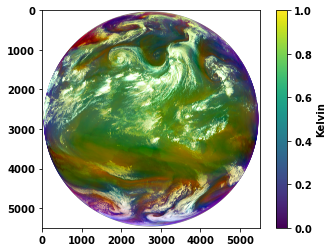

In [14]:
image = plt.imread('airmass.png') 
plt.imshow(image)
cbar=plt.colorbar()
cbar.set_label("Kelvin")
plt.show()